In [13]:
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import curve_fit
import os
import pandas as pd
from sklearn.preprocessing import Normalizer, normalize
import numpy as np
from sklearn.linear_model import LinearRegression

/tmp/ipykernel_44286/2945227054.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Height[data['Marker'].isin(temp_list)] = data[data['Marker'].isin(temp_list)]['Height']/2
/tmp/ipykernel_44286/2945227054.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Height[data['Marker'].isin(temp_list)] = data[data['Marker'].isin(temp_list)]['Height']/2
/tmp/ipykernel_44286/2945227054.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

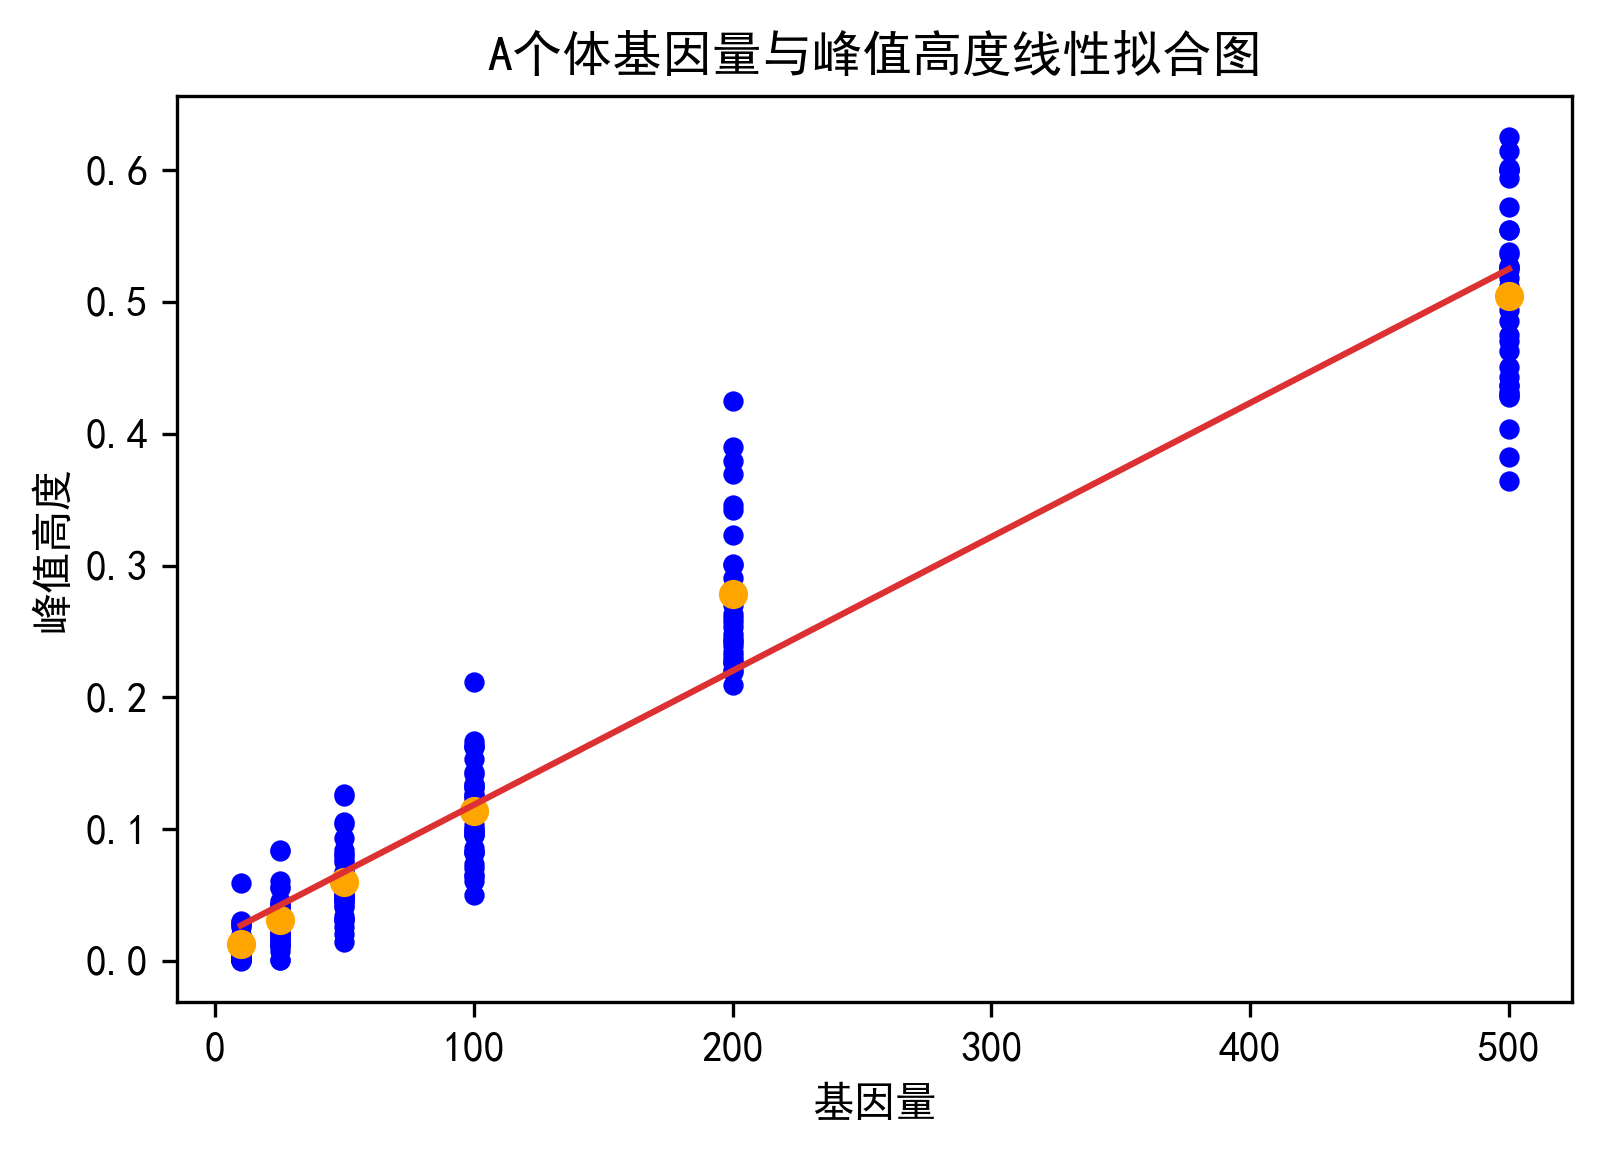

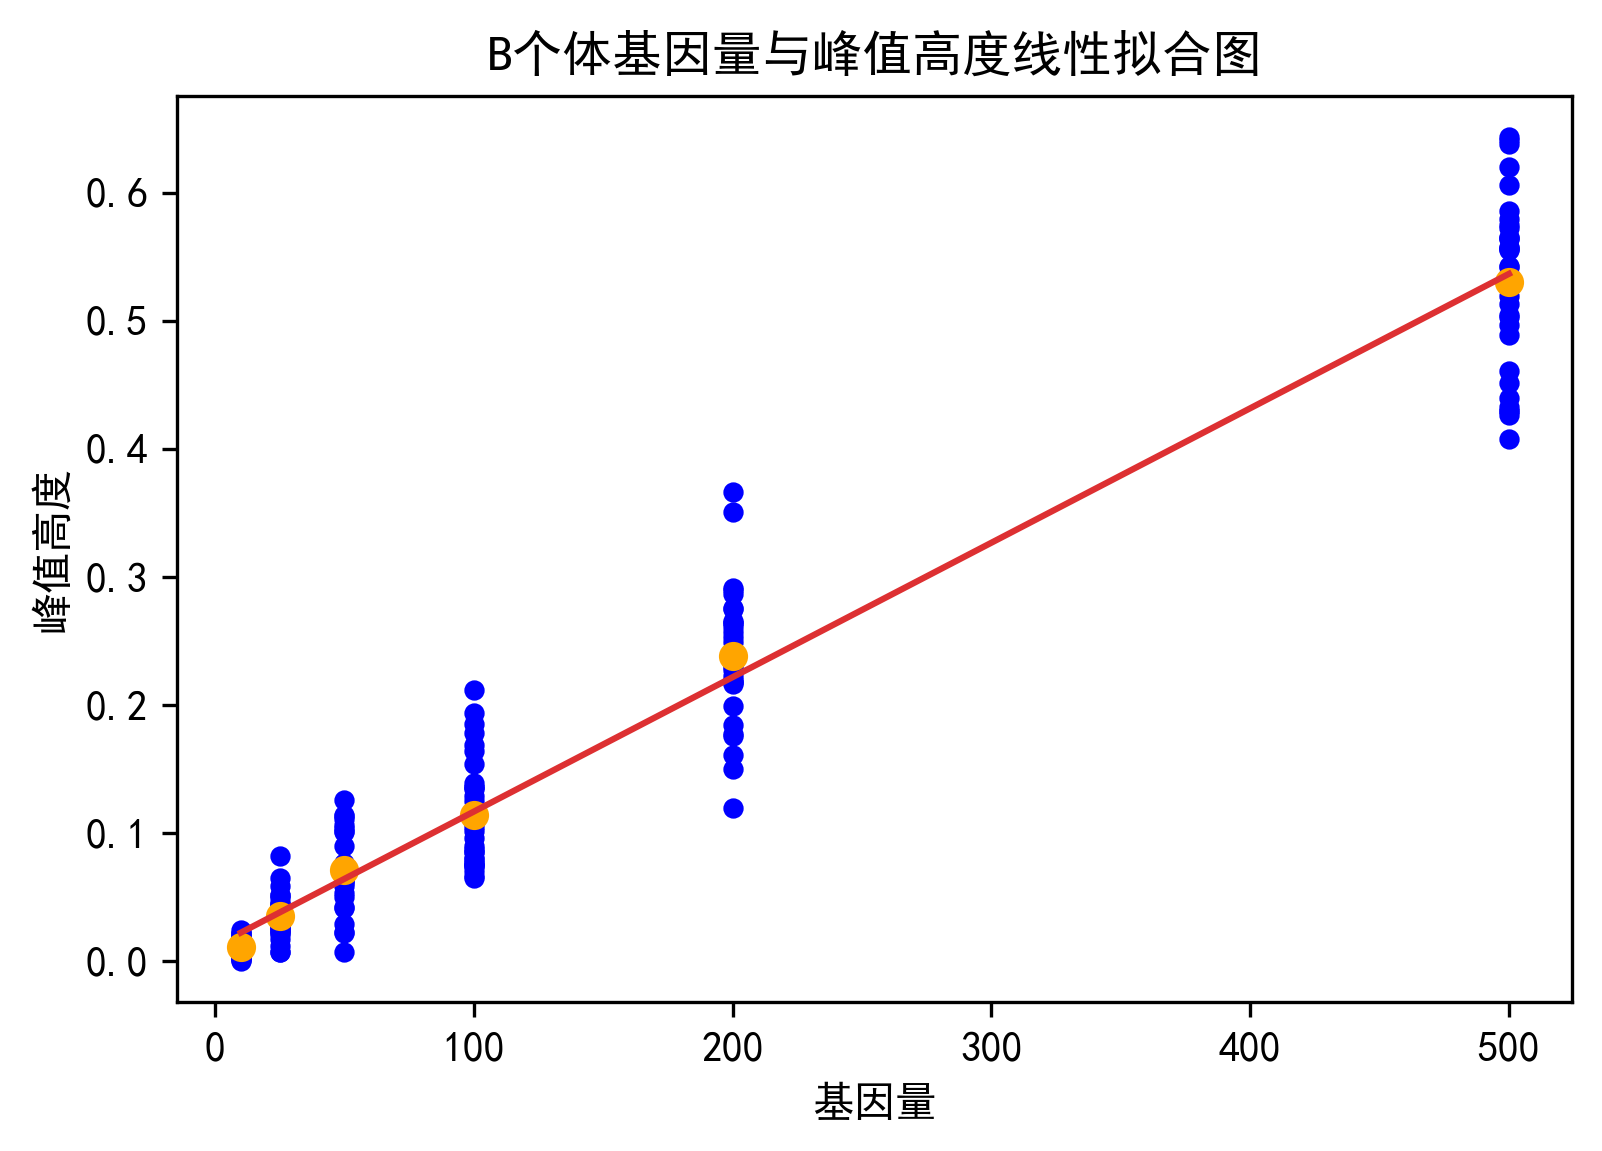

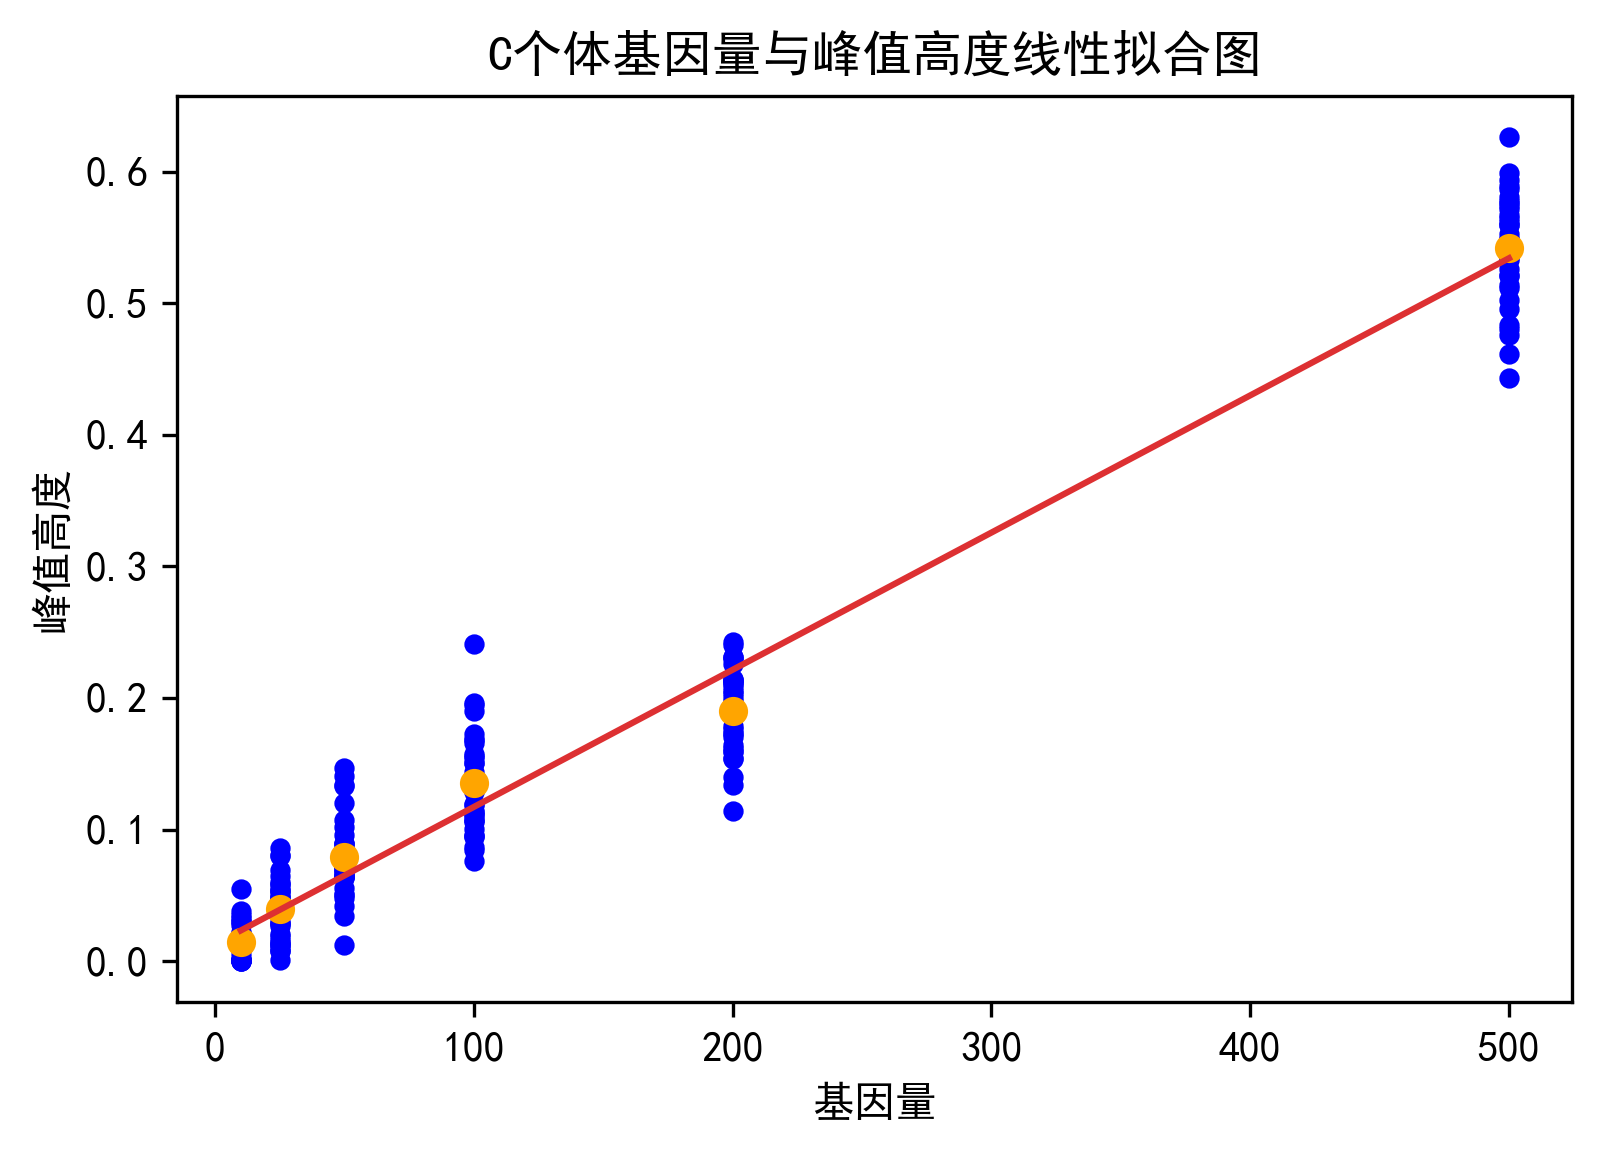

In [14]:
Person = 'C'
goal_data = {'个体':[], '斜率':[], '截距':[], 'R2':[]}
for Person in ['A', 'B', 'C']:
    X = [10, 25, 50, 100, 200, 500]
    data_list = []
    length_list = []
    for x in X:
        temp_list = []
        data = pd.read_csv(f'data/{Person}{x}_fileter.csv')
        sum = data['Marker'].value_counts()
        for i in range(len(sum.values)):
            if sum.values[i] == 1:
                temp_list.append(sum.index[i])
        data.Height[data['Marker'].isin(temp_list)] = data[data['Marker'].isin(temp_list)]['Height']/2
        data_list.append(data['Height'].values)

    norm_data_list = []
    for i in range(len(data_list[0])):
        temp_data = []
        temp_data.append(data_list[0][i])
        temp_data.append(data_list[1][i])
        temp_data.append(data_list[2][i])
        temp_data.append(data_list[3][i])
        temp_data.append(data_list[4][i])
        temp_data.append(data_list[5][i])
        # 所有数据正则化
        norm_data = Normalizer(norm='l1').fit_transform(np.array(temp_data, dtype='float32').reshape(1, -1))
        norm_data_list.append(norm_data[0])

        matplotlib.rcParams['font.sans-serif'] = ['SimHei']
    matplotlib.rcParams['font.family']='sans-serif' #解决负号'-'显示为方块的问题
    matplotlib.rcParams['axes.unicode_minus'] = False
    plt.figure(dpi=300)
    plt.title(f'{Person}个体基因量与峰值高度线性拟合图')
    plt.xlabel('基因量')
    plt.ylabel('峰值高度')

    mean_list = []
    # 求每个基因量的平均峰值高度
    for i in range(6):
        num_list = []
        for norm_data in norm_data_list:
            num_list.append(norm_data[i])
        mean_list.append(np.mean(num_list))

    for i in range(len(norm_data_list)):
        plt.scatter(X, norm_data_list[i], color='b', s=15)

    plt.scatter(X, mean_list, color='orange', marker='o')


    # 横坐标为X， 纵坐标为mean_list,做线性回归
    x = np.array(X).reshape(-1, 1)
    y = np.array(mean_list).reshape(-1, 1)
    model = LinearRegression()
    model.fit(x, y)
    # 查看系数

    plt.plot(x, model.predict(x), color='#dd3032')

    goal_data['个体'].append(Person)
    goal_data['斜率'].append(model.coef_[0][0])
    goal_data['截距'].append(model.intercept_[0])
    goal_data['R2'].append(model.score(x, y))

goal_data 
pd.DataFrame(goal_data).to_csv('直线拟合.csv')

In [15]:


# def func(x, a, b, c):
#     return a * np.exp(-b * x) + c

# popt, pcov = curve_fit(func, X, mean_list)

# y2 = [func(i, popt[0],popt[1], popt[2]) for i in X]
# plt.plot(X, y2,'r--')
# print(popt)
# with open(f'img/Line{Person}.png','wb') as f:  
#     plt.savefig(f, format='png', dpi=300)